# 単回帰モデルの実装

## 必要なライブラリのインポート

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import *

## ①データを取得する

In [2]:
# データが格納されているtsvファイルの中身の確認
with open("exam_results.tsv", "r") as f:
    data = f.read()
    
print(data)

"study hour"	"score"
40	91
15	38
23	62
10	30
12	45
26	49
18	50
31	63
25	87


In [3]:
# tsvファイルからx, yのデータを取得
x = []
y = []

for i, line in enumerate(data.split("\n")):
    if i == 0:
        continue
    tmp_x, tmp_y = line.split("\t")
    x.append(int(tmp_x))
    y.append(int(tmp_y))
    
print("x:", x)
print("y:", y)

x: [40, 15, 23, 10, 12, 26, 18, 31, 25]
y: [91, 38, 62, 30, 45, 49, 50, 63, 87]


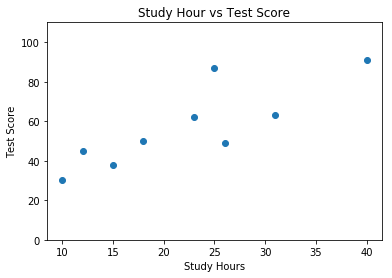

In [4]:
# データのプロット　
fig, ax = plt.subplots(1, 1)
plt.plot(x, y, "o")
plt.title("Study Hour vs Test Score")
ax.set_xlabel("Study Hours")
ax.set_ylabel("Test Score")
plt.ylim(0, 110)
plt.show()

## ②モデルの選択/定義をする

In [5]:
# 今回使用するモデルのクラス(単回帰モデル)
class LinearModel:
    
    def __init__(self):
        self.a = normal(0.0, 0.1)
        self.b = normal(0.0, 0.1)
        
    def __call__(self, x):
        y = self.a * x + self.b
        return y

## ③傾き a と 切片 b のパラメータの初期値をランダムに決める

In [6]:
# クラスLinearModelをインスタンス化するときにパラメータ a と b の初期化を行う
linear_model = LinearModel()

# ランダムに設定されたパラメータ"a"と"b"の値の確認
print("aの値:", linear_model.a, "bの値:", linear_model.b)

aの値: -0.056403962351838526 bの値: -0.026368710845758786


## ④損失関数の設定

In [7]:
# 今回使用する損失関数を定義(二乗誤差)
def mean_squared_error(true_value, predicted_value):
    E = 1/2 * np.square(true_value - predicted_value)
    return E

## ⑤勾配降下法で学習

In [8]:
# データに対して標準化を行う関数
def standardize(inp, mean, std):
    # スカラー値もnumpy配列も入力可
    return (inp - mean) / std

# 標準化された数値を元に戻すための関数
def destandardize(standardized_v, mean, std):
    output = mean + standardized_v * std
    return output

# 学習データ用にデータを標準化する関数
def standardize_list(list_values):
    np_array = np.array(list_values)
    mean = np_array.mean()
    std = np_array.std()
    results = []
    for num in list_values:
        z = standardize(num, mean, std)
        results.append(z)
    return results, mean, std

standardized_x, x_mean, x_std = standardize_list(x)
standardized_y, y_mean, y_std = standardize_list(y)
print("標準化後のx:")
print(standardized_x)
print("標準化後のy:")
print(standardized_y)

標準化後のx:
[1.9611613513818404, -0.7967217989988725, 0.0858008091229556, -1.348298429075015, -1.127667777044558, 0.41674678716864116, -0.465775820953187, 0.9683234172447838, 0.30643146115341263]
標準化後のy:
[1.7218338830893947, -0.9798594137317935, 0.2435488716211973, -1.3876621755161238, -0.6230319971705046, -0.4191306162783394, -0.36815527105529816, 0.2945242168442386, 1.5179325021972294]


In [9]:
## 以下3つはグラフ描画用の関数
def predict_to_plot(model, inputs, mean, std):
    standardized_inputs = standardize(inputs, mean, std)
    np_arr_standardized_inputs = np.array(standardized_inputs)
    standardized_pred_values = model(np_arr_standardized_inputs)
    pred_values = []
    for standardized_v in standardized_pred_values:
        out = destandardize(standardized_v, y_mean, y_std)
        pred_values.append(out)
    return pred_values

def set_axis(x, y, model, ax, title):
    x_for_model = np.linspace(0, 50, 1000)
    pred_values = predict_to_plot(model, x_for_model, x_mean, x_std)
    ax.plot(x, y, 'o')
    ax.plot(x_for_model, pred_values)
    ax.set_title(title)
    ax.set_xlabel("Study Hours")
    ax.set_ylabel("Test Score")
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 100)
    ax.grid(True)
    
def prepare_fig(rows, cols):
    n_rows = rows
    n_cols = cols
    fig = plt.figure(figsize=(13, 40))
    ax_list = []
    set_range = n_rows * n_cols if n_rows * n_cols % 2 == 0 else n_rows * n_cols - 1
    for i in range(n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        ax = plt.subplot2grid((n_rows, n_cols), (row, col))
        ax_list.append(ax)
    return fig, ax_list

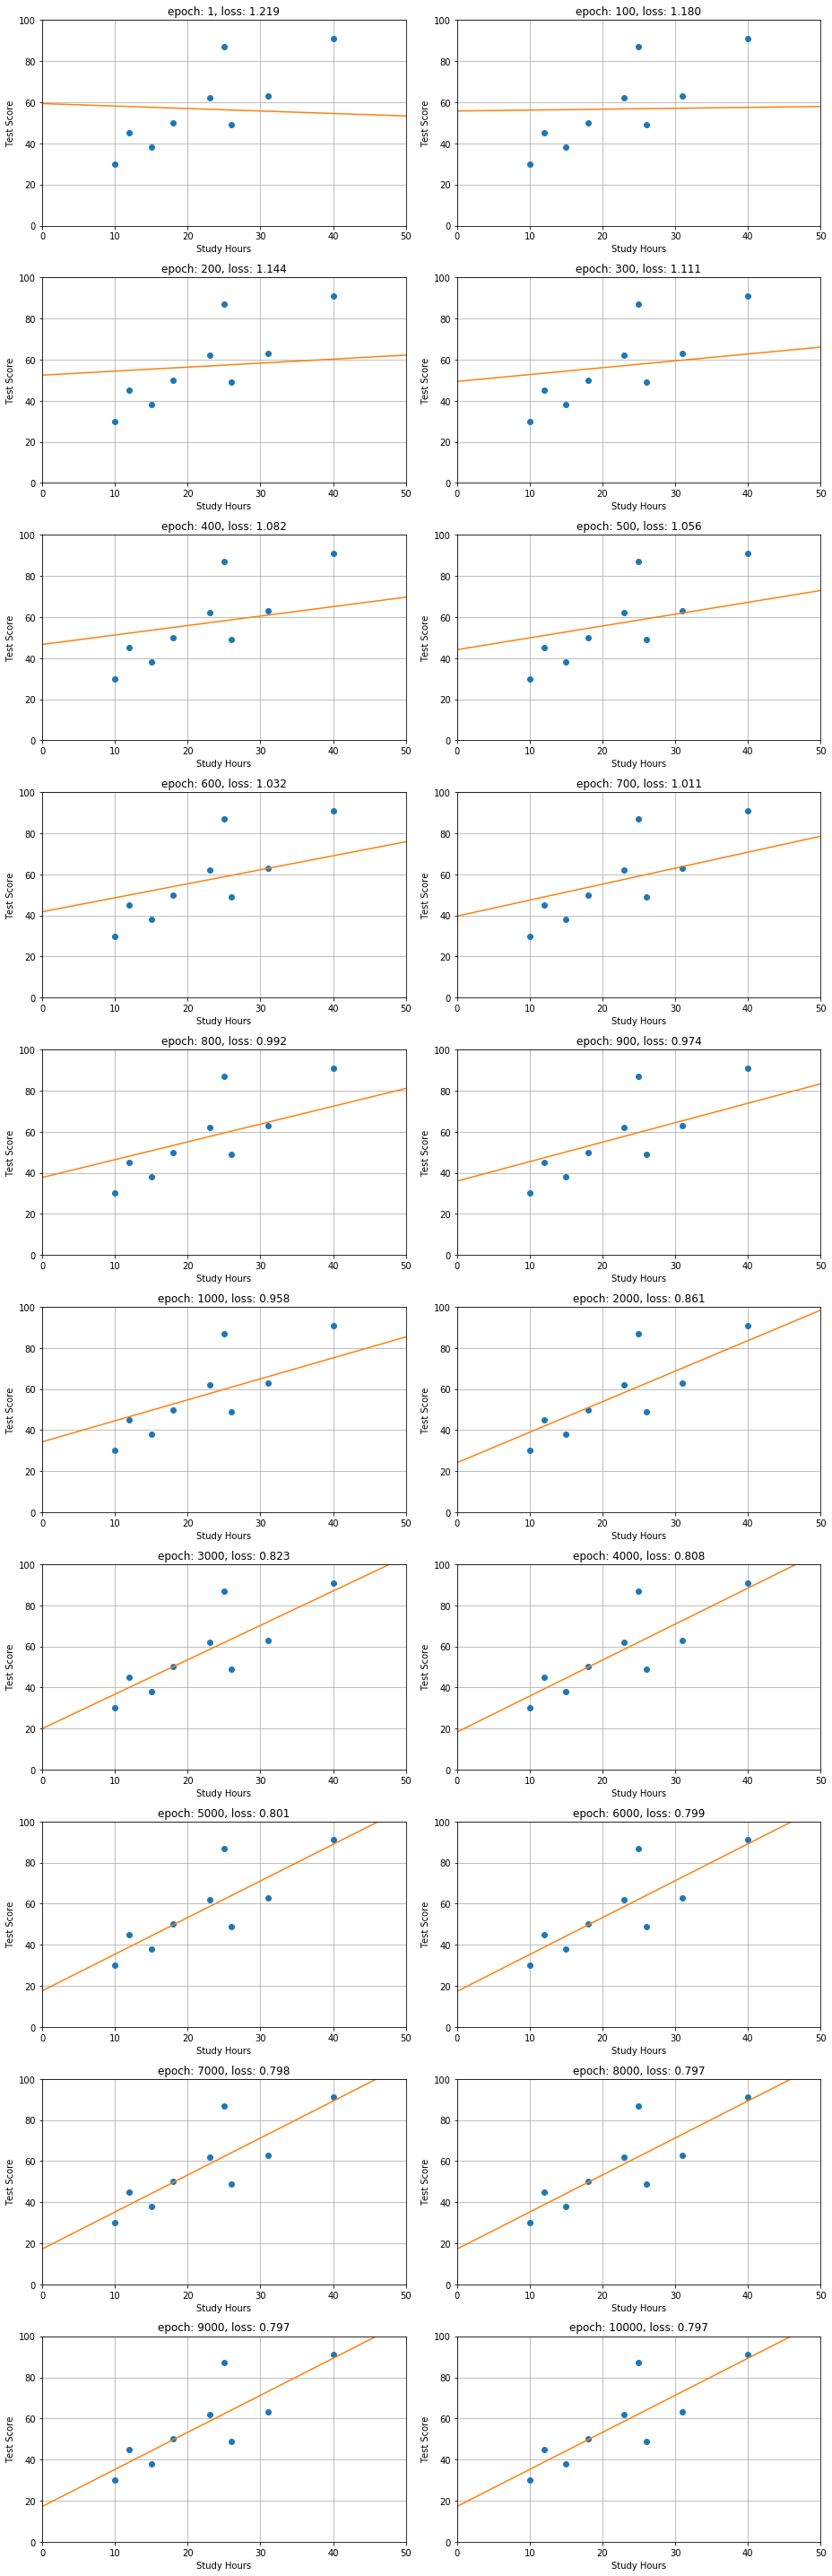

In [10]:
E_log = []
a_log = []
b_log = []

num_epoch = 10000
learning_rate = 0.0001

fig, axes = prepare_fig(10, 2)
j = 0

# 学習を行う
for epoch in range(num_epoch):
    for (x_i, y_i) in zip(standardized_x, standardized_y):
        pred_i = linear_model(x_i)
        E = mean_squared_error(y_i, pred_i)
        E_log.append(E)
        a_log.append(linear_model.a)
        b_log.append(linear_model.b)
        parts_of_gradient = (pred_i - y_i)
        linear_model.a = linear_model.a - learning_rate * (parts_of_gradient * x_i)
        linear_model.b = linear_model.b - learning_rate * (parts_of_gradient * 1)
        
    if epoch == 0 or ((epoch+1) % 100 == 0 and epoch <= 1000) or ((epoch+1) % 1000) == 0:
        title = "epoch: {}, loss: {:,.3f}".format(epoch+1, E)
        set_axis(x, y, linear_model, axes[j], title)
        j += 1

plt.tight_layout()

## テストの点予測デモ

In [12]:
# デモ用の関数
def main():
    x = input("あなたが勉強する予定の時間を入力してください。: ")
    try:
        std_x = (float(x) - x_mean) / x_std
        output = linear_model(std_x)
        predicted_score = destandardize(output, y_mean, y_std)
        # from np.float64 to float
        predicted_score = float(predicted_score)
        if predicted_score < 0:
            raise ValueError("正しい値を入力してください。")
        elif predicted_score >= 100:
            predicted_score = 100
        elif predicted_score < 0:
            predicted_score = 0
        print("あなたはこのクラスのテストで {}点 "
              "とることができるでしょう。".format(round(predicted_score)))
    except ValueError:
        print("数値を入力してください。")

In [13]:
# デモ開始
main()

あなたが勉強する予定の時間を入力してください。: 45
あなたはこのクラスのテストで 98点 とることができるでしょう。
